<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>PROJECT | REGRESSION MODEL DEVELOPMENT</h2>
DAT-5303 | Machine Learning</h4><br>
Naila Jan - MBAN1<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [381]:
# importing libraries
import pandas as pd # data science essentials
import numpy as np # data science essentials
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
import sklearn.linear_model # linear models
from sklearn.model_selection import train_test_split  # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


# specifying the path and file name
file = './birthweight_low.xlsx'


# reading the file into Python
birthwgt = pd.read_excel(io  =file,
                       header =0,
                       sheet_name =0)


birthwgt.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827


In [382]:
# looking for the missing values
birthwgt.isnull().sum(axis=0)


mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

# Imputing the missing values in the dataset by the median of that column

In [383]:
# imputing the missing values by the median of that column

# meduc - fill with mode value
fill = birthwgt['meduc'].median()
birthwgt['meduc'] = birthwgt['meduc'].fillna(value = fill)

birthwgt['meduc'].isnull().any(axis = 0)

# npvis - fill with mode value
fill = birthwgt['npvis'].median()
birthwgt['npvis'] = birthwgt['npvis'].fillna(value = fill)

birthwgt['npvis'].isnull().any(axis = 0)


# feduc - fill with mode value
fill = birthwgt['feduc'].median()
birthwgt['feduc'] = birthwgt['feduc'].fillna(value = fill)

# after filling with the mode value, see the missing values in the dataset
birthwgt.isnull().any(axis = 0).sum(axis = 0)



0

# Checking the skewness of variables 

array([[<AxesSubplot:title={'center':'mage'}>,
        <AxesSubplot:title={'center':'meduc'}>,
        <AxesSubplot:title={'center':'monpre'}>,
        <AxesSubplot:title={'center':'npvis'}>],
       [<AxesSubplot:title={'center':'fage'}>,
        <AxesSubplot:title={'center':'feduc'}>,
        <AxesSubplot:title={'center':'omaps'}>,
        <AxesSubplot:title={'center':'fmaps'}>],
       [<AxesSubplot:title={'center':'cigs'}>,
        <AxesSubplot:title={'center':'drink'}>,
        <AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'mwhte'}>],
       [<AxesSubplot:title={'center':'mblck'}>,
        <AxesSubplot:title={'center':'moth'}>,
        <AxesSubplot:title={'center':'fwhte'}>,
        <AxesSubplot:title={'center':'fblck'}>],
       [<AxesSubplot:title={'center':'foth'}>,
        <AxesSubplot:title={'center':'bwght'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

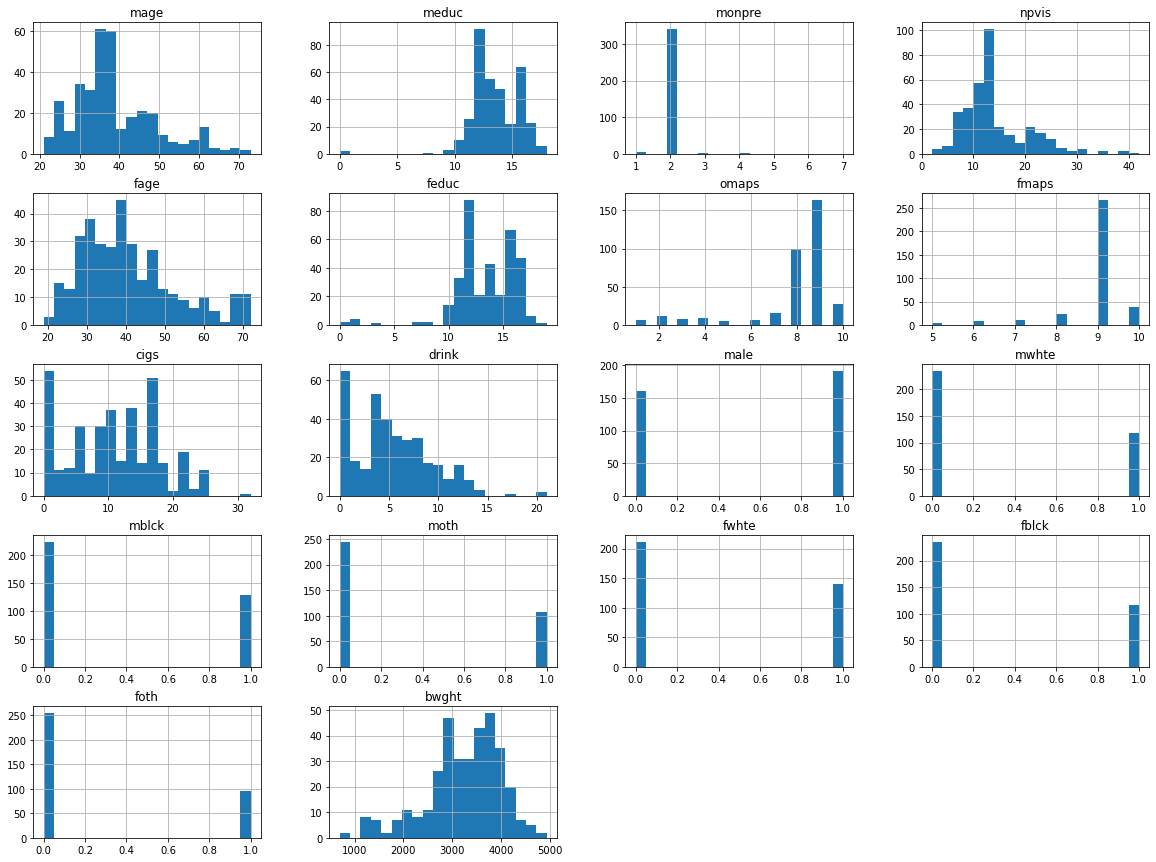

In [384]:
# checking the visualization of data using hist graph
birthwgt.hist(figsize = (20,15), bins = 20)

## converting features to log form

In [385]:
# log transforming mage and saving it to the dataset
birthwgt['log_mage'] = np.log(birthwgt['mage'] + 0.001)

# log transforming meduc and saving it to the dataset
birthwgt['log_meduc'] = np.log(birthwgt['meduc'] + 0.001)

# log transforming bwght and saving it to the dataset
birthwgt['log_bwght'] = np.log(birthwgt['bwght'] + 0.001)


# log transforming monpre and saving it to the dataset
birthwgt['log_monpre'] = np.log(birthwgt['monpre'] + 0.001)


# log transforming npvis and saving it to the dataset
birthwgt['log_npvis'] = np.log(birthwgt['npvis'] + 0.001)


# log transforming fage and saving it to the dataset
birthwgt['log_fage'] = np.log(birthwgt['fage'] + 0.001)


# log transforming feduc and saving it to the dataset
birthwgt['log_feduc'] = np.log(birthwgt['feduc'] + 0.001)


# # log transforming omaps and saving it to the dataset
birthwgt['log_omaps'] = np.log(birthwgt['omaps'] + 0.001)


# # log transforming fmaps and saving it to the dataset
birthwgt['log_fmaps'] = np.log(birthwgt['fmaps'] + 0.001)


# log transforming cigs and saving it to the dataset
birthwgt['log_cigs'] = np.log(birthwgt['cigs'] + 0.001)


# log transforming drink and saving it to the dataset
birthwgt['log_drink'] = np.log(birthwgt['drink'] + 0.001)


# log transforming male and saving it to the dataset
birthwgt['log_male'] = np.log(birthwgt['male'] + 0.001)


# log transforming mwhte and saving it to the dataset
birthwgt['log_mwhte'] = np.log(birthwgt['mwhte'] + 0.001)


# log transforming mblck and saving it to the dataset
birthwgt['log_mblck'] = np.log(birthwgt['mblck'] + 0.001)


# log transforming mwhte and saving it to the dataset
birthwgt['log_mwhte'] = np.log(birthwgt['mwhte'] + 0.001)


# log transforming moth and saving it to the dataset
birthwgt['log_moth'] = np.log(birthwgt['moth'] + 0.001)


# log transforming fwhte and saving it to the dataset
birthwgt['log_fwhte'] = np.log(birthwgt['fwhte'] + 0.001)


# log transforming fblck and saving it to the dataset
birthwgt['log_fblck'] = np.log(birthwgt['fblck'] + 0.001)



# log transforming foth and saving it to the dataset
birthwgt['log_foth'] = np.log(birthwgt['foth'] + 0.001)





## Visualizing the log form of the features

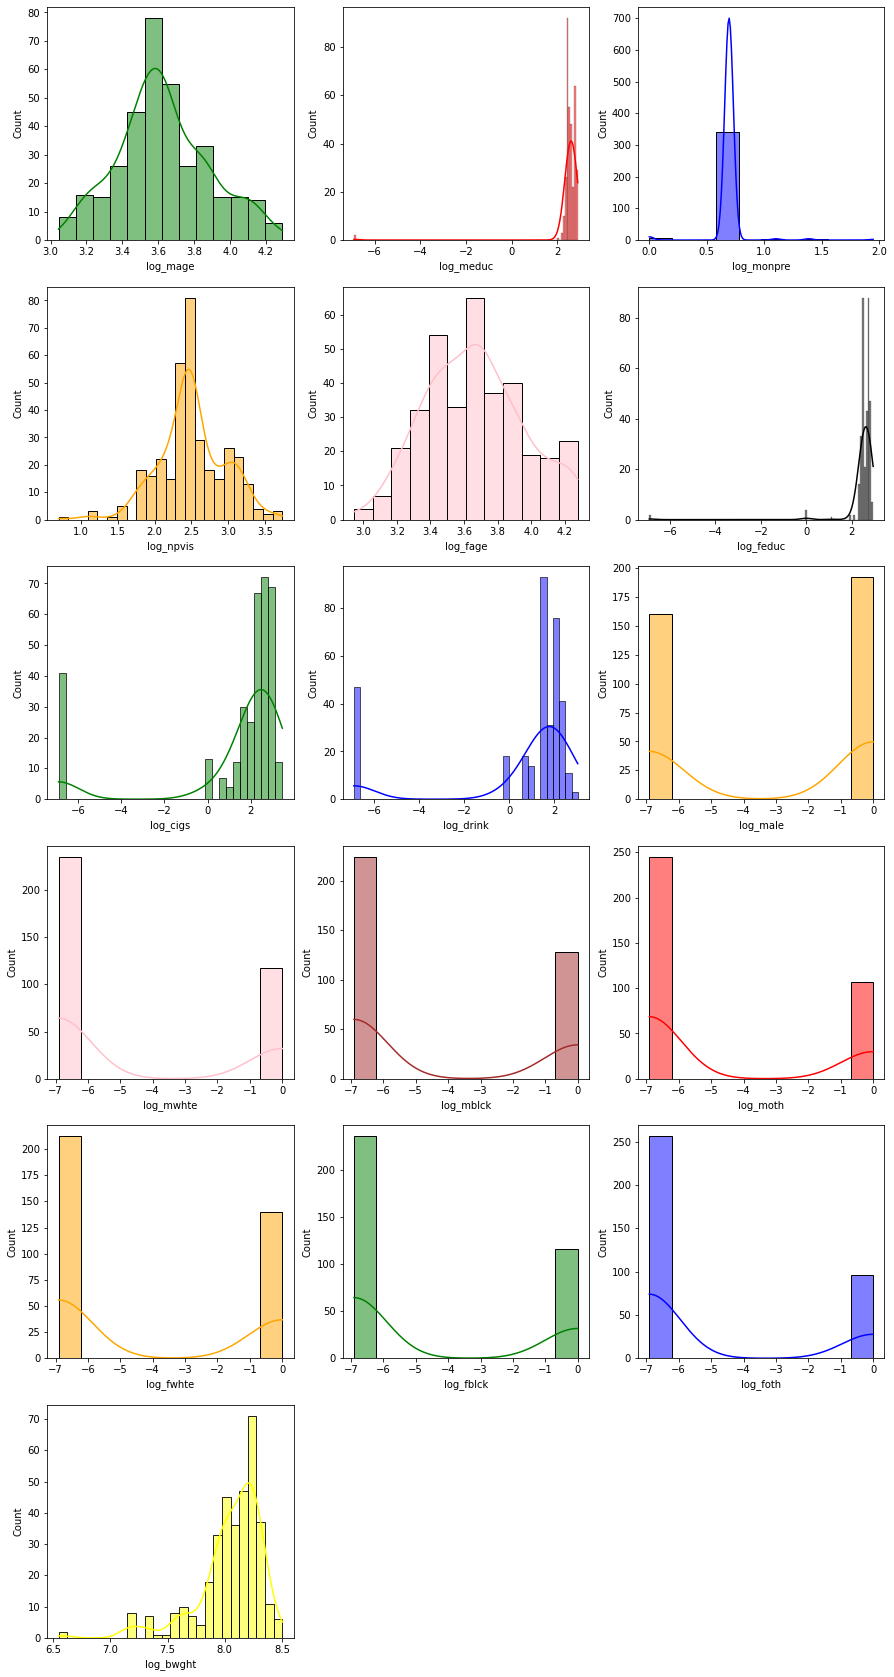

In [386]:

# log transforming bwght and saving it to the dataset
########################
# Visual Histogram
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 30))

# displaying the plot for 'log_mage'
plt.subplot(6, 3, 1)
sns.histplot (x = "log_mage", color = "green",
        data = birthwgt,
        kde = True)


################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 2)
sns.histplot (x = "log_meduc",color = "red",
        data = birthwgt,
        kde = True)

################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 3)
sns.histplot (x = "log_monpre",color = "blue",
        data = birthwgt,
        kde = True)


################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 4)
sns.histplot (x = "log_npvis", color = "orange",
        data = birthwgt,
        kde = True)

################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 5)
sns.histplot (x = "log_fage",color = "pink",
        data = birthwgt,
        kde = True)


################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 6)
sns.histplot (x = "log_feduc",color = "black",
        data = birthwgt,
        kde = True)



################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 7)
sns.histplot (x = "log_cigs",color = "green",
        data = birthwgt,
        kde = True)


################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 8)
sns.histplot (x = "log_drink",color = "blue",
        data = birthwgt,
        kde = True)


################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 9)
sns.histplot (x = "log_male",color = "orange",
        data = birthwgt,
        kde = True)




################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 10)
sns.histplot (x = "log_mwhte",color = "pink",
        data = birthwgt,
        kde = True)



################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 11)
sns.histplot (x = "log_mblck",color = "brown",
        data = birthwgt,
        kde = True)



################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 12)
sns.histplot (x = "log_moth",color = "red",
        data = birthwgt,
        kde = True)



################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 13)
sns.histplot (x = "log_fwhte",color = "orange",
        data = birthwgt,
        kde = True)



################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 14)
sns.histplot (x = "log_fblck",color = "green",
        data = birthwgt,
        kde = True)



################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 15)
sns.histplot (x = "log_foth",color = "blue",
        data = birthwgt,
        kde = True)


################
# displaying the plot for 'log_mage'
plt.subplot(6, 3, 16)
sns.histplot (x = "log_bwght", color = "yellow",
        data = birthwgt,
        kde = True)

plt.show()

## Defining the Data Types

## Find co-relation of baby weight with other features

In [387]:

# creating a list of continuous features with all the other variables
continuous_data = ["bwght", "meduc", "monpre","log_npvis", "mage","log_monpre",
                   "npvis", "fage", "feduc", "cigs", "drink"]


# developing a correlation matrix based on continuous features
birthwgt_corr = birthwgt[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with bwght
birthwgt_corr.loc[ : , "bwght"].round(decimals = 2).sort_values(ascending = False)

bwght         1.00
log_npvis     0.36
npvis         0.30
feduc         0.23
meduc         0.20
monpre        0.02
log_monpre    0.01
mage         -0.48
cigs         -0.57
fage         -0.58
drink        -0.67
Name: bwght, dtype: float64

In [388]:
# Just to see the number of updated columns
birthwgt.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'log_mage', 'log_meduc', 'log_bwght', 'log_monpre',
       'log_npvis', 'log_fage', 'log_feduc', 'log_omaps', 'log_fmaps',
       'log_cigs', 'log_drink', 'log_male', 'log_mwhte', 'log_mblck',
       'log_moth', 'log_fwhte', 'log_fblck', 'log_foth'],
      dtype='object')

### Splitting data into test and train 

In [391]:
# preparing explanatory variable data
birthwgt_data   = birthwgt.drop(['monpre', 'npvis','omaps', 'fmaps', 'log_mage',
                               'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
                               'foth', 'log_meduc', 'log_fage', 'log_feduc', 'log_bwght', 
                               'log_omaps', 'log_fmaps', 'log_cigs', 'log_drink', 'log_male', 
                               'log_mwhte', 'log_mblck', 'log_moth', 'log_fwhte', 'log_fblck', 
                                 'log_foth'],
                               axis = 1)
    
                    
# preparing response variables
birthwgt_target = birthwgt.loc[ : , 'log_bwght']
#log_birthwgt_target = birthwgt.loc[ : , 'log_bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthwgt_data,         # x data
            log_birthwgt_target,       # y data
            test_size = 0.25,     # size of training set
            random_state = 219)   # lock in random sequence 


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (264, 9)
y-side: (264,)


Testing Data
------------
X-side: (88, 9)
y-side: (88,)



In [390]:
# displaying the Explonatery dataset
birthwgt_data

,mage,meduc,fage,feduc,cigs,drink,bwght,log_monpre,log_npvis
0,23,11.0,46,12.0,13,4,3600,1.386544,2.397986
1,23,16.0,50,12.0,1,1,3912,1.098946,2.302685
2,24,16.0,26,16.0,21,4,3090,0.001000,2.484990
3,25,14.0,33,12.0,12,7,3370,1.098946,2.484990
4,25,12.0,32,12.0,4,3,3827,0.693647,2.079567
...,...,...,...,...,...,...,...,...,...
347,61,11.0,69,10.0,25,11,1290,0.693647,2.397986
348,40,12.0,49,12.0,17,13,1956,0.693647,1.946053
349,45,12.0,71,11.0,21,12,1490,0.693647,1.791926
350,46,12.0,55,13.0,17,12,2050,0.693647,2.565026


# Applying Model in Scikit-Learn

In [392]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# SCORING the results
print('OLS Training Score :', lr.score(x_train, y_train).round(2))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(2))


# saving scoring data for future use
lr_train_score = lr.score(x_train, y_train).round(2) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(2)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(2))
lr_test_gap = abs(lr_train_score - lr_test_score).round(2)

OLS Training Score : 0.96
OLS Testing Score  : 0.95
OLS Train-Test Gap : 0.01


# Implementing the OLS Regression


In [380]:
# Step 1: INSTANTIATE a model object

# I have combined the male & female education, male & female ang, and drink and cigs variables
# I added these combined variables.

lm_best = smf.ols(formula = """ log_bwght ~ meduc *   
                                            feduc+
                                            fage *
                                            mage+
                                           log_npvis+
                                           log_monpre+
                                           cigs *
                                           drink
                                        """,
                  data = birthwgt)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          2.12e-112
Time:                        13:55:36   Log-Likelihood:                 224.60
No. Observations:                 352   AIC:                            -425.2
Df Residuals:                     340   BIC:                            -378.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1603      0.160     44.762      

# Lasso Model

In [359]:
## For Lasso Model I have droped the bwght because I am using this as my target variable.
### Lasso was not performing well for teh log version of bwght.
## The same goes for ARD And KNN



# # FULL X-dataset (normal Y)
birthwgt_data   = birthwgt.drop(['bwght' ],
                               axis = 1)
birthwgt_target = birthwgt.loc[ : , 'bwght']
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
             birthwgt_data,     # x-variables
             birthwgt_target,   # y-variable
             test_size = 0.25,
             random_state = 219)

In [360]:


# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(2))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(2))


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(2) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(2)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(2))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(2)

Lasso Training Score : 0.96
Lasso Testing Score  : 0.95
Lasso Train-Test Gap : 0.01


# Automatic Relevance Determination Regression (ARD) Model

In [361]:
# applying model in scikit-learn

# # Preparing the target variable
birthwgt_target = birthwgt.loc[ : , 'bwght']



# OLS p-value x-dataset (normal Y)
x_train_ARD, x_test_ARD, y_train_ARD, y_test_ARD = train_test_split(
             birthwgt_data,         # x-variables
            birthwgt_target,   # y-variable
            test_size = 0.25,
           random_state = 219)

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)

# FITTING the training data
ard_fit = ard_model.fit(x_train_ARD, y_train_ARD)

# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_ARD)

print('Training Score:', ard_model.score(x_train_ARD, y_train_ARD).round(2))
print('Testing Score :',  ard_model.score(x_test_ARD, y_test_ARD).round(2))

# saving scoring data for future use
ard_train_score = ard_model.score(x_train_ARD, y_train_ARD).round(2)
ard_test_score  = ard_model.score(x_test_ARD, y_test_ARD).round(2)

# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(2))
ard_test_gap = abs(ard_train_score - ard_test_score).round(2)

Training Score: 0.96
Testing Score : 0.94
ARD Train-Test Gap : 0.02


# k-Nearest Neighbors with Non-Standardized Data

In [362]:
# this is the exact code we were using before
# # Preparing the target variable
birthwgt_target = birthwgt.loc[ : , 'bwght']
x_train, x_test, y_train, y_test = train_test_split(
            birthwgt_data,
            birthwgt_target,
            test_size = 0.25,
            random_state = 219)

In [374]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 30)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(2))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(2))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(2)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(2)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(2))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(3)

KNN Training Score: 0.62
KNN Testing Score : 0.57
KNN Train-Test Gap: 0.05


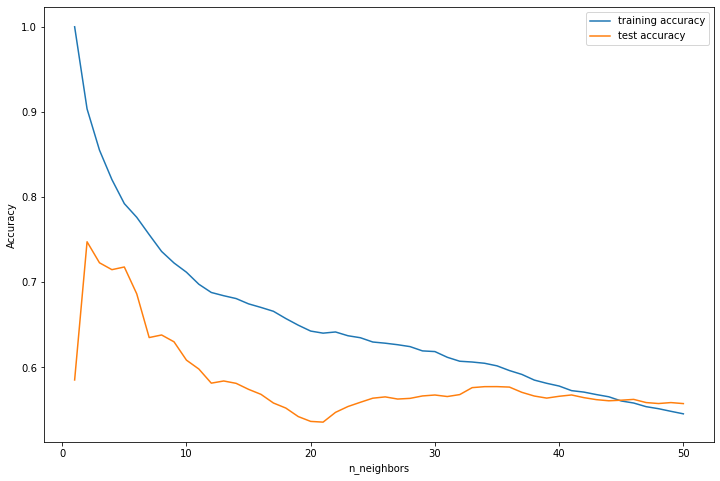

In [375]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [376]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 2


# Comparing Results

In [393]:
# comparing results

print(f"""
Below is the performance of our models, based on their results we choose 
"OLS Model" because of its accuracy gap which is 0%. Also, OLS is 
the method used to find the simple linear regression of a set of data.Linear 
regression refers to any approach to model a LINEAR relationship between 
one or more variables, which make it simpler and easy to understandable.


Model      Train Score      Test Score      Accuracy Gape     
-----      -----------      ----------       ----------
*OLS         {lr_train_score}               {lr_test_score}               {lr_test_gap}
 Lasso       {lasso_train_score}               {lasso_test_score}               {lasso_test_gap}
 ARD         {ard_train_score}               {ard_test_score}               {ard_test_gap}
 KNN         {knn_reg_score_train}               {knn_reg_score_test}               {knn_reg_test_gap}
""")


# creating a dictionary for model results


Below is the performance of our models, based on their results we choose 
"OLS Model" because of its accuracy gap which is 0%. Also, OLS is 
the method used to find the simple linear regression of a set of data.Linear 
regression refers to any approach to model a LINEAR relationship between 
one or more variables, which make it simpler and easy to understandable.


Model      Train Score      Test Score      Accuracy Gape     
-----      -----------      ----------       ----------
*OLS         0.96               0.95               0.01
 Lasso       0.96               0.95               0.01
 ARD         0.96               0.94               0.02
 KNN         0.62               0.57               0.05

